# Clustering Lab

 
Based of the amazing work you did in the Movie Industry you've been recruited to the NBA! You are working as the VP of Analytics that helps support a head scout, Mr. Rooney, for the worst team in the NBA probably the Wizards. Mr. Rooney just heard about Data Science and thinks it can solve all the team's problems!!! He wants you to figure out a way to find players that are high performing but maybe not highly paid that you can steal to get the team to the playoffs! 

In this document you will work through a similar process that we did in class with the NBA data (NBA_Perf_22 and nba_salaries_22), merging them together.

Details: 

- Determine a way to use clustering to estimate based on performance if 
players are under or over paid, generally. 

- Then select players you believe would be best for your team and explain why. Do so in three categories: 
    * Examples that are not good choices (3 or 4) 
    * Several options that are good choices (3 or 4)
    * Several options that could work, assuming you can't get the players in the good category (3 or 4)

- You will decide the cutoffs for each category, so you should be able to explain why you chose them.

- Provide a well commented and clean report of your findings in a separate notebook that can be presented to Mr. Rooney, keeping in mind he doesn't understand...anything. Include a rationale for variables you included in the model, details on your approach and a overview of the results with supporting visualizations. 


Hints:

- Salary is the variable you are trying to understand 
- When interpreting you might want to use graphs that include variables that are the most correlated with Salary
- You'll need to scale the variables before performing the clustering
- Be specific about why you selected the players that you did, more detail is better
- Use good coding practices, comment heavily, indent, don't use for loops unless totally necessary and create modular sections that align with some outcome. If necessary create more than one script,list/load libraries at the top and don't include libraries that aren't used. 
- Be careful for non-traditional characters in the players names, certain graphs won't work when these characters are included.


In [47]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [74]:
# Load the datasets
NBA_perf = pd.read_csv('NBA_PlayerStats2324.csv', encoding="latin1")
NBA_salary = pd.read_csv('NBA_salary.csv', encoding="latin1")

In [75]:
# Merging the two datasets
NBA = pd.merge(NBA_perf, NBA_salary, how='inner', left_on='Player', right_on='Player')
NBA['Salary'] = NBA['2024-25'].str.replace('$', '').str.replace(',', '').astype(float)
NBA.head()

,Rk_x,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,Tm,2024-25,2025-26,2026-27,2027-28,2028-29,2029-30,Guaranteed,-9999,Salary
0,1.0,Luka DonÄiÄ,24.0,DAL,PG,70.0,70.0,2624.0,804.0,1652.0,...,LAL,$43031940,$45999660,$48967380,NaN,NaN,NaN,$89031600,doncilu01,43031940.0
1,2.0,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,2553.0,796.0,1487.0,...,OKC,$35859950,$38333050,$40806150,NaN,NaN,NaN,$114999150,gilgesh01,35859950.0
2,3.0,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,2567.0,837.0,1369.0,...,MIL,$48787676,$54126450,$58456566,$62786682,NaN,NaN,$161370692,antetgi01,48787676.0
3,4.0,Jalen Brunson,27.0,NYK,PG,77.0,77.0,2726.0,790.0,1648.0,...,NYK,$24960001,$34944001,$37739521,$40535041,$43330561,NaN,$138178564,brunsja01,24960001.0
4,5.0,Nikola JokiÄ,28.0,DEN,C,79.0,79.0,2737.0,822.0,1411.0,...,DEN,$51415938,$55224526,$59033114,$62841702,NaN,NaN,$165673578,jokicni01,51415938.0


In [76]:
#Drop variables that will not be needed or are duplicates
def drop_columns(df):
     # Dropping all repetitive columns
     df = df.drop(columns=['Rk_x','GS', 'FGA', 'FG%', '3PA', '3P%',
          '2PA', '2P%', 'FTA', 'FT%', 'ORB', 'DRB', 'Awards', 'Player-additional', 
          '2024-25', '2025-26', '2026-27', '2027-28', '2028-29', '2029-30',
          'Tm', 'Guaranteed', '-9999', 'Rk_y'], axis=1)  
     df = df.dropna()

     # Dropping duplicates
     df = df.drop_duplicates(subset = ['Player'], keep = 'last')
     return df

NBA = drop_columns(NBA)

In [77]:
# Scale the data

columns_for_scaling = ['FG','3P', '2P', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV']
scaler = StandardScaler()
NBA[columns_for_scaling] = scaler.fit_transform(NBA[columns_for_scaling])


In [78]:
#Run the clustering algo with your best guess for K
clust_data1 = NBA[["FG", "AST", "TRB"]]
kmeans_obj1 = KMeans(n_clusters=2, random_state=1).fit(clust_data1)

In [79]:
#View the results
print("Results:")
print(kmeans_obj1.cluster_centers_)
print(kmeans_obj1.labels_)
print(kmeans_obj1.inertia_)

Results:
[[ 1.11653579  0.9969124   0.93640791]
 [-0.59408131 -0.53043264 -0.49823968]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
544.5826178691678


In [80]:
#Create a visualization of the results with 2 or 3 variables that you think will best
#differentiate the clusters

fig = px.scatter_3d(NBA, x='FG', y='AST', z='TRB', color=kmeans_obj1.labels_,
                     title='NBA Players Clustering',
                     labels={'FG': 'Field Goals', 'AST': 'Assists', 'TRB': 'Total Rebounds'},
                     color_continuous_scale=px.colors.sequential.Viridis)
fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.show()

In [ ]:
#Evaluate the quality of the clustering using total variance explained and silhouette scores
print("Cluster Evaluation:")
# Total Variance Explained and Silhouette Score 
# Total Variance Explained
total_sum_squares = np.sum((clust_data1 - np.mean(clust_data1))**2)
total = np.sum(total_sum_squares)
between_SSE = (total-kmeans_obj1.inertia_)
var_explained = between_SSE/total
print(f'Total Variance Explained: {var_explained}')
# Silhouette Score
silhouette_avg = silhouette_score(clust_data1, kmeans_obj1.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Cluster Evaluation:
Total Variance Explained: 0.5528878342617669
Silhouette Score: 0.5182414341100418


/home/vscode/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



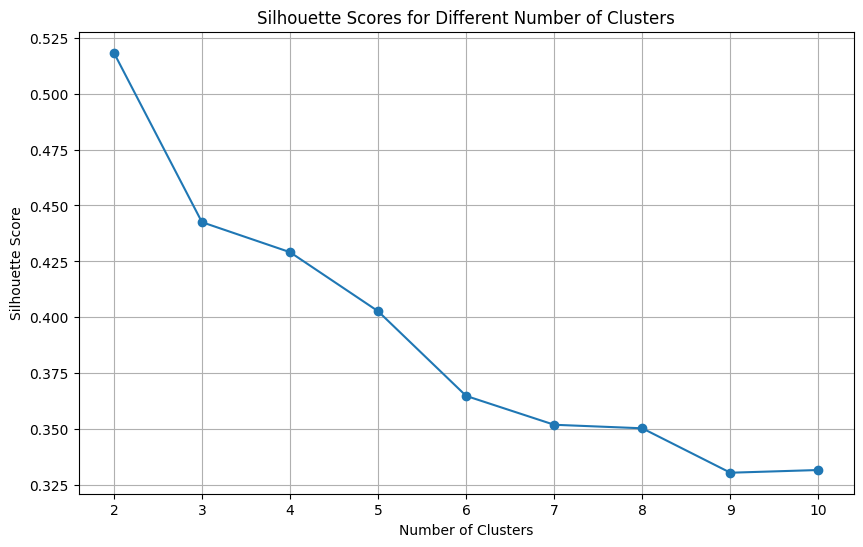

In [82]:
#Determine the ideal number of clusters using the elbow method and the silhouette coefficient

# Silhouette Coefficient
silhouette_scores = []
for k in range(2, 11):
    kmeans_obj = KMeans(n_clusters=k, random_state=1).fit(clust_data1)
    silhouette_avg = silhouette_score(clust_data1, kmeans_obj.labels_)
    silhouette_scores.append(silhouette_avg)
# Plotting the silhouette scores
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

In [83]:
#Visualize the results of the elbow method

# Elbow Method 
css = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(clust_data1)
    css.append(kmeans.inertia_)
               
elbow_data = pd.DataFrame({'Clusters': range(2, 11), 'CSS': css})
fig = px.line(elbow_data, x='Clusters', y='CSS', title='Elbow Method for Optimal Clusters',
                 labels={'Clusters': 'Number of Clusters', 'CSS': 'Total Sum of Squares'})
fig.show()

In [94]:
#Use the recommended number of cluster (assuming it's different) to retrain your model and visualize the results

# Assuming the recommended number of clusters is 4
kmeans_obj1 = KMeans(n_clusters=4, random_state=1).fit(clust_data1)
NBA['Cluster'] = kmeans_obj1.labels_
fig = px.scatter_3d(NBA, x='FG', y='AST', z='TRB', color=kmeans_obj1.labels_,
                     title='NBA Players Clustering',
                     labels={'FG': 'Field Goals', 'AST': 'Assists', 'TRB': 'Total Rebounds'},
                     color_continuous_scale=px.colors.sequential.Viridis)
fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.show()

In [ ]:
#Once again evaluate the quality of the clustering using total variance explained and silhouette scores
print("Cluster Evaluation:")
# Total Variance Explained and Silhouette Score 
# Total Variance Explained
total_sum_squares = np.sum((clust_data1 - np.mean(clust_data1))**2)
total = np.sum(total_sum_squares)
between_SSE = (total-kmeans_obj1.inertia_)
var_explained = between_SSE/total
print(f'Total Variance Explained: {var_explained}')
# Silhouette Score
silhouette_avg = silhouette_score(clust_data1, kmeans_obj1.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Cluster Evaluation:
Total Variance Explained: 0.7471107722921323
Silhouette Score: 0.4291182269396123


/home/vscode/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [98]:
#Use the model to select players for Mr. Rooney to consider

# Best Players in Cluster 2 
def undervalued_players1(cluster, num_players):
    df = NBA[NBA['Cluster'] == cluster].copy()
    # Using a performance score 
    df['Performance'] = df['FG'] + df['AST'] + df['TRB']
    # Using performance per salary
    df['Value'] = df['Performance'] / df['Salary']
    # Select top players by value
    players = df.nlargest(num_players, 'Value')
    return players[['Player', 'Salary', 'FG', 'AST', 'TRB', 'Value']]
players = undervalued_players1(2, 5)
print("Top 5 Undervalued Players in Cluster 2:")
print(players)

Top 5 Undervalued Players in Cluster 2:
             Player      Salary        FG       AST       TRB         Value
162      Tyus Jones   2087519.0  0.503751  2.430106 -0.293348  1.264903e-06
48   Jalen Williams   4775760.0  1.614801  1.269666  0.248037  6.559172e-07
110     Josh Giddey   8352367.0  0.905845  1.725299  1.467467  4.907125e-07
15   Paolo Banchero  12160800.0  2.165035  2.045665  1.677714  4.842127e-07
37     Franz Wagner   7007092.0  1.572475  0.892345  0.768397  4.614207e-07


In [100]:
# Best Players in Cluster 3
def undervalued_players2(cluster, num_players):
    df = NBA[NBA['Cluster'] == cluster].copy()
    # Using a performance score 
    df['Performance'] = df['FG'] + df['AST'] + df['TRB']
    # Using performance per salary
    df['Value'] = df['Performance'] / df['Salary']
    # Select top players by value
    players = df.nlargest(num_players, 'Value')
    return players[['Player', 'Salary', 'FG', 'AST', 'TRB', 'Value']]
players = undervalued_players2(3, 5)
print("Top 5 Undervalued Players in Cluster 5:")
print(players)

Top 5 Undervalued Players in Cluster 5:
               Player     Salary        FG       AST       TRB         Value
53   Alperen ÅengÃ¼n  5424654.0  1.567184  1.198473  1.861679  8.530198e-07
148       Jalen Duren  4536840.0  0.625438  0.023795  2.492419  6.924758e-07
126     Jalen Johnson  4510905.0  0.678345  0.422474  1.330807  5.390549e-07
140     Jeremy Sochan  5570040.0  0.577821  0.749960  1.267733  4.659776e-07
209     Jabari Walker  2019699.0  0.017006 -0.517269  1.435930  4.632706e-07


In [101]:
# Bad choices players
def overvalued_players(cluster, num_players):
    df = NBA[NBA['Cluster'] == cluster].copy()
    # Using a performance score 
    df['Performance'] = df['FG'] + df['AST'] + df['TRB']
    # Using performance per salary
    df['Value'] = df['Performance'] / df['Salary']
    # Select bad players by value
    players = df.nsmallest(num_players, 'Value')
    return players[['Player', 'Salary', 'FG', 'AST', 'TRB', 'Value']]
players = overvalued_players(1, 5)
print("Top 5 Overvalued Players:")
print(players)

Top 5 Overvalued Players:
                    Player    Salary        FG       AST       TRB     Value
501            Daishen Nix  119972.0 -1.173404 -0.980021 -1.218434 -0.000028
434  Javon Freeman-Liberty  100000.0 -0.930032 -0.737966 -0.866270 -0.000025
419        Bismack Biyombo  143967.0 -1.183986 -1.008498 -1.139591 -0.000023
455            Chuma Okeke  119972.0 -1.009392 -0.880351 -0.813709 -0.000023
400         Eugene Omoruyi  119972.0 -0.792473 -0.773562 -0.787428 -0.000020


Answer: 
* Examples that are not good choices (3 or 4) 
  * Daishen Nix, Bismack Biyombo, Chuma Okeke
* Several options that are good choices (3 or 4)
  * Tyus Jones, Jalen Williams, Josh Giddey
* Several options that could work, assuming you can't get the players in the good category (3 or 4)
  * Alperen Sengun, Jalen Duren, Jalen Johnson, Jeremy Sochan

In [70]:
#Write up the results in a separate notebook with supporting visualizations and an overview of how and why
#you made the choices you did. This should be at least 500 words and should be written for a non-technical audience.


